In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import datetime
import numpy as np
import seaborn as sns
import re
import json
import pandas as pd
import math
import ast
import os
import sys
sys.path.append('..')
from utilities import logger
from utilities import configuration


In [3]:
config = configuration.get_config()
for key in config:
    print(f'{key:40} (type: {type(config[key])})')


logging = logger.init_logger(config['system_log'])
logging.debug('Logger has started ont notebook 09 Random sample of instances.ipynb ...')

system_log                               (type: <class 'str'>)
json_file                                (type: <class 'str'>)
unified_merged_file_cz                   (type: <class 'str'>)
unified_merged_file_noncz                (type: <class 'str'>)
unified_merged_file                      (type: <class 'str'>)
data_path                                (type: <class 'str'>)
cz_files                                 (type: <class 'list'>)
noncz_files                              (type: <class 'list'>)
2023-10-26 11:32:38,960 - root - DEBUG - Logger has started ont notebook 09 Random sample of instances.ipynb ...


In [4]:
f = open(config['json_file'])
data = json.load(f)
print(len(data))

618697


In [12]:
np.random.randint(2**63)

8949144142486521501

In [13]:
rng = np.random.default_rng(seed=8949144142486521501)

In [15]:
no_of_instances_in_random_sample=10000
indexes = rng.choice(range(len(data)), size=no_of_instances_in_random_sample, replace=False)
indexes[:10]
sample = [data[str(ix)] for ix in indexes]
len(sample)

10000

In [32]:
set([data[ix]['Admit Category'] for ix in data])

{'L Elective',
 'N Newborn',
 None,
 'R Cadaver-adm for organ,tiss r',
 'S Stillborn',
 'U Emergent, urgent'}

In [22]:
for elem in data['0'].keys():
    print(f'{elem:20} '+ str(data['0'][elem]))

HCN code             1159480
Institution Number   65
Admit Date           2014-12-24 00:00:00
Discharge Date       2015-01-01 00:00:00
Readmission Code     5 New patient to the acute care unit
Patient Age          67
Gender               Male
MRDx                 K746  Other and unspecified cirrhosis of liver
Postal Code          B3A2K1
Diagnosis Code       ['K746', 'K431', 'R18', 'K760', 'K650', 'I518', 'L988', 'L984', 'K439', 'J90']
Diagnosis Long Text  ['Other and unspecified cirrhosis of liver', 'Incisional hernia with gangrene', 'Ascites', 'Fatty (change of) liver, not elsewhere classified', 'Acute peritonitis', 'Other ill-defined heart diseases', 'Other specified disorders of skin and subcutaneous tissue', 'Chronic ulcer of skin, not elsewhere classified', 'Other and unspecified ventral hernia without obstruction or gangrene', 'Pleural effusion, not elsewhere classified']
Diagnosis Type       ['M', '1', 'W', '1', '1', '1', '1', '1', '1', '3']
Intervention Code    ['1OT52HHD1']
Px

(0.0, 2500.0)

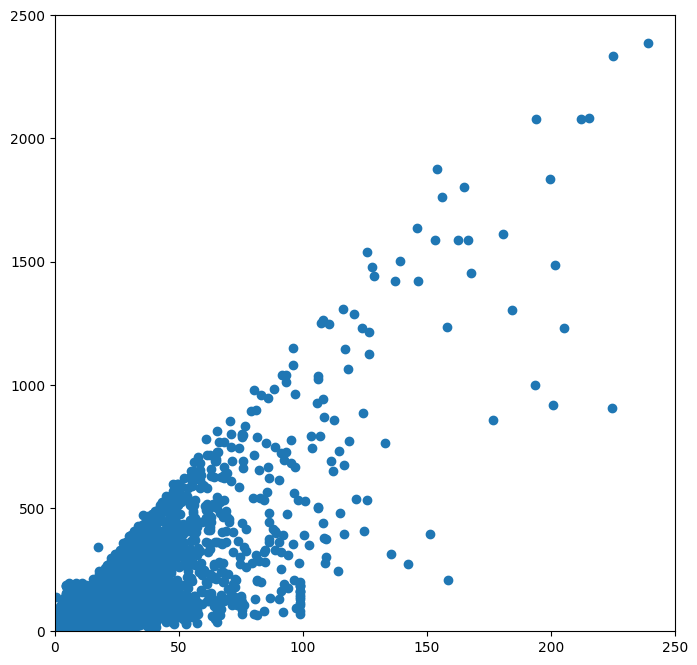

In [29]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.scatter([data[ix]['Case Weight'] for ix in data],
           [data[ix]['Acute Days']+data[ix]['ALC Days'] for ix in data]
          )

ax.set_xlim(0,250)
ax.set_ylim(0,2500)

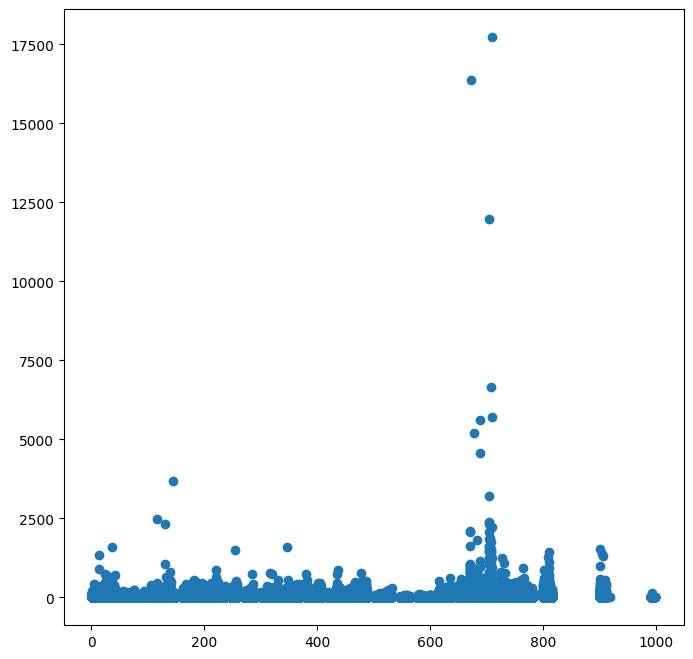

In [31]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.scatter([data[ix]['CMG'] for ix in data],
           [data[ix]['Acute Days']+data[ix]['ALC Days'] for ix in data]
          )
